### Extracting Data From HTML

**OBJECTIVES**


- Use `pd.read_html` to extract data from website tables
- Use `bs4` to parse html returned with requests.

In [41]:
import requests

In [42]:
url = 'https://catfact.ninja/fact'

In [43]:
response = requests.get(url)

In [44]:
response

<Response [200]>

In [45]:
response.json()

{'fact': 'The life expectancy of cats has nearly doubled over the last fifty years.',
 'length': 73}

### Putting APIs Together

Lucky for us, there is also a cat api that delivers random pictures of cats. Let's explore the documentation [here](https://developers.thecatapi.com/view-account/ylX4blBYT9FaoVd6OhvR?report=bOoHBz-8t). 

In [46]:
from IPython.display import Image

Cats often overract to unexpected stimuli 
because of their extremely sensitive nervous system.


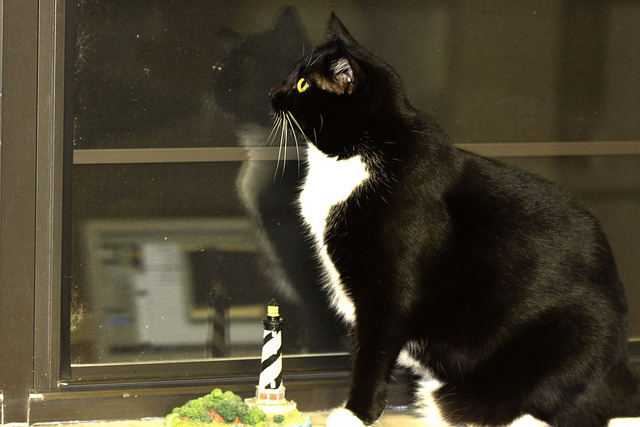

In [47]:
print('Cats often overract to unexpected stimuli \nbecause of their extremely sensitive nervous system.')
Image('https://cdn2.thecatapi.com/images/dia.jpg', width = 400, height = 300)

In [49]:
#make request for random cat picture
cat_pic_url = 'https://api.thecatapi.com/v1/images/search'
pic_response = requests.get(cat_pic_url)
pic_response

<Response [200]>

In [52]:
#extract the url
cat_pic = pic_response.json()
cat_pic[0]['url']

'https://cdn2.thecatapi.com/images/80v.gif'

The life expectancy of cats has nearly doubled over the last fifty years.


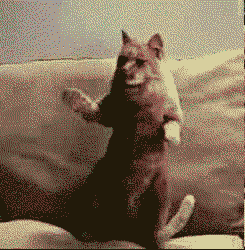

In [54]:
#display a random picture of a cat with a random cat fact
print(response.json()['fact'])
cat_pic = pic_response.json()
Image(cat_pic[0]['url'])

### Reading in Data from HTML Tables

Now, we turn to one more approach in accessing data. As we've seen, you may have `json` or `csv` when querying a data API. Alternatively, you may receive HTML data where information is contained in tags.  Below, we examine some basic html tags and their effects.

```html
<h1>A Heading</h1>
<p>A first paragraph</p>
<p>A second paragraph</p>
<table>
  <tr>
    <th>Album</th>
    <th>Rating</th>
  </tr>
  <tr>
    <td>Pink Panther</td>
    <td>10</td>
  </tr>
</table>
```

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests

In [56]:
html = '''
<h1>A Heading</h1>
<p>A first paragraph</p>
<p>A second paragraph</p>
<table>
  <tr>
    <th>Album</th>
    <th>Rating</th>
  </tr>
  <tr>
    <td>Pink Panther</td>
    <td>10</td>
  </tr>
</table>
'''

In [57]:
from IPython.display import HTML

In [58]:
HTML(html)

### Making a request of a url

Let's begin with some basketball information from basketball-reference.com:

- https://www.basketball-reference.com/wnba

The tables on the page will be picked up (hopefully!) by the `read_html` function in pandas.

In [59]:
#visit the url below
url = 'https://www.basketball-reference.com/wnba'

In [60]:
#assign the results as data
#read_html
wnba = pd.read_html(url)

In [61]:
#what kind of object is data?
type(wnba)

list

In [62]:
#first element?
wnba[0]

Team   W   L   W/L%    GB
0           Minnesota Lynx*  34  10  0.773     —
1           Las Vegas Aces*  30  14  0.682   4.0
2            Atlanta Dream*  30  14  0.682   4.0
3          Phoenix Mercury*  27  17  0.614   7.0
4         New York Liberty*  27  17  0.614   7.0
5            Indiana Fever*  24  20  0.545  10.0
6            Seattle Storm*  23  21  0.523  11.0
7   Golden State Valkyries*  23  21  0.523  11.0
8        Los Angeles Sparks  21  23  0.477  13.0
9        Washington Mystics  16  28  0.364  18.0
10          Connecticut Sun  11  33  0.250  23.0
11              Chicago Sky  10  34  0.227  24.0
12             Dallas Wings  10  34  0.227  24.0

In [63]:
#examine information
wnba[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    13 non-null     object 
 1   W       13 non-null     int64  
 2   L       13 non-null     int64  
 3   W/L%    13 non-null     float64
 4   GB      13 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 652.0+ bytes


In [64]:
#last dataframe?
wnba[-1]

Unnamed: 0  PTS  TRB  AST  GmSc
0     A'ja Wilson  (LVA)   35    8    5  31.8
1    Jackie Young  (LVA)   32    4   10  29.6
2    Chelsea Gray  (LVA)   17    2    6  18.8
3    Odyssey Sims  (IND)   27    2    6  18.4
4  Natasha Howard  (IND)   16    7    5  11.6

**Example 2**

List of best selling albums from Wikipedia.

- https://en.wikipedia.org/wiki/List_of_best-selling_albums

In [65]:
url = 'https://en.wikipedia.org/wiki/List_of_best-selling_albums'

In [66]:
#read in the tables
pd.read_html(url)

HTTPError: HTTP Error 403: Forbidden

### Scraping the Web for Data

Sometimes the data is not formatted as an `html` table or `pd.read_html` simply doesn't work.  In these situations you can use the `bs4` library and its `BeautifulSoup` object to parse HTML tags and extract information.  First, make sure you have the library installed and can import it below.

In [ ]:
# pip install -U bs4

In [67]:
from bs4 import BeautifulSoup
import requests

In [68]:
sample_html = '''
<h1>Music Reviews</h1>
<p>This album was awful. <strong>Score</strong>: <i class = "score">2</i></p>
<p class = "good">This album was great. <strong>Score</strong>: <i class = "score">8</i></p>
'''

In [69]:
# create a soup object
soup = BeautifulSoup(sample_html)

In [70]:
# examine the soup
soup

<html><body><h1>Music Reviews</h1>
<p>This album was awful. <strong>Score</strong>: <i class="score">2</i></p>
<p class="good">This album was great. <strong>Score</strong>: <i class="score">8</i></p>
</body></html>

In [71]:
# find the <p> tags
soup.find('p')

<p>This album was awful. <strong>Score</strong>: <i class="score">2</i></p>

In [72]:
# find the i tag
soup.find('i')

<i class="score">2</i>

In [73]:
# find all the i tags
soup.find_all('i')

[<i class="score">2</i>, <i class="score">8</i>]

In [74]:
# find all good paragraphs
soup.find('p', {'class': 'good'})

<p class="good">This album was great. <strong>Score</strong>: <i class="score">8</i></p>

#### Extracting Data from a URL

1. Make a request.
2. Turn the request into soup!

In [75]:
url = 'https://pitchfork.com/reviews/albums/'

In [76]:
#make a request
r = requests.get(url)

In [77]:
r

<Response [200]>

In [78]:
#examine the text
r.text[:1000]

'<!DOCTYPE html><html lang="en-US"><head><title>New Albums &amp; Music Reviews | Pitchfork</title><meta charSet="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta name="msapplication-tap-highlight" content="no"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="author" content="Condé Nast"/><meta name="copyright" content="Copyright (c) Condé Nast 2025"/><meta name="description" content="Daily reviews of every important album in music"/><meta name="id" content="65ce02a52126d093a5f585e1"/><meta name="keywords" content="web"/><meta name="news_keywords" content="web"/><meta name="robots" content="index, follow, max-image-preview:large"/><meta name="content-type" content="bundle"/><meta name="parsely-post-id" content="65ce02a52126d093a5f585e1"/><meta name="parsely-metadata" content="{&quot;description&quot;:&quot;Daily reviews of every important album in music&quot;,&quot;image-16-9&quot;:&quot;https://media.pitchfork.com/photos/5935a027a28a0

In [79]:
#turn it into soup!
soup = BeautifulSoup(r.text)

### Using Inspect

You can inspect an items HTML code by right clicking on the item of interest and selecting **inspect**.  Here, you will see the html tags that surround the object of interest.  

For example, when writing this lesson a recent album review on pitchfork was *Mustafa: Dunya*.  Right clicking on the image of the album cover and choosing inspect showed:

![](images/pitch_cover.png )

In [82]:
#find the img tag
rjordan = soup.find('img', {'alt': 'Through the Wall'})

In [87]:
#extract the url
rjordan.attrs['src']

'https://media.pitchfork.com/photos/686fda609a8ba5160e24a4f5/1:1/w_1600%2Cc_limit/Rochelle-Jordan-Through-the-Wall.jpeg'

In [90]:
#find all img tags
album_covers = soup.find_all('img', {'loading': 'eager'})

In [91]:
#explore attributes
album_covers[0].attrs

{'alt': 'Through the Wall',
 'loading': 'eager',
 'class': ['ResponsiveImageContainer-eNxvmU',
  'cfBbTk',
  'responsive-image__image'],
 'src': 'https://media.pitchfork.com/photos/686fda609a8ba5160e24a4f5/1:1/w_1600%2Cc_limit/Rochelle-Jordan-Through-the-Wall.jpeg',
 'data-src': 'https://media.pitchfork.com/photos/686fda609a8ba5160e24a4f5/1:1/w_1600%2Cc_limit/Rochelle-Jordan-Through-the-Wall.jpeg'}

In [92]:
#extract source of image url
for album in album_covers:
    print(album['src'])

https://media.pitchfork.com/photos/686fda609a8ba5160e24a4f5/1:1/w_1600%2Cc_limit/Rochelle-Jordan-Through-the-Wall.jpeg
https://media.pitchfork.com/photos/68d451a69c3c6f55d4d0056c/1:1/w_1600%2Cc_limit/Olivia%2520Dean:%2520The%2520Art%2520of%2520Loving.jpg
https://media.pitchfork.com/photos/68d4592a6ed8409621157708/1:1/w_1600%2Cc_limit/crushed:%2520no%2520scope.jpg
https://media.pitchfork.com/photos/68d2e2d8e65ab6c4e53d0d3b/1:1/w_1600%2Cc_limit/Doja-Cat-Vie.jpeg
https://media.pitchfork.com/photos/68d2e2decb3272812d7f2419/1:1/w_1600%2Cc_limit/M-Sage-Tender-Wading.jpeg
https://media.pitchfork.com/photos/68d2e68641514ff7aced1edb/1:1/w_1600%2Cc_limit/Xexa-Kissom.jpeg
https://media.pitchfork.com/photos/686c9e74a532685e05d31b79/1:1/w_1600%2Cc_limit/Neko-Case-Neon-Grey-Midnight-Green.jpeg
https://media.pitchfork.com/photos/683f1d0c3fde63fa7e254a8c/1:1/w_1600%2Cc_limit/Cate-Le-Bon-Michelangelo-Dying.jpeg
https://media.pitchfork.com/photos/68d2e4248fa679692ea3b0b0/1:1/w_1600%2Cc_limit/Amanda-Shir

In [94]:
# extract the genre tags
soup.find('span', {'class': 'rubric__name'}).text

'Pop/R&B'

In [95]:
# extract the text from the genres
genres = soup.find_all('span', {'class': 'rubric__name'})

In [97]:
#[i.text for i in genres]
genre_list = []
for genre in genres:
    genre_list.append(genre.text)

In [98]:
set(genre_list)

{'Electronic',
 'Experimental',
 'Folk/Country',
 'Jazz',
 'Metal',
 'Pop/R&B',
 'Rap',
 'Rock'}

#### Problem

Head over to [Quotes to Scrape](https://quotes.toscrape.com/) and use `requests` and `BeautifulSoup` to extract and structure the quotes as a `DataFrame` similar to that below:

| quote | author | tags |
| ------ | --------- | ------- |
| The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking | Albert Einstein |  [change ,deep-thoughts, thinking, world] |

In [99]:
url = 'https://quotes.toscrape.com/'
r = requests.get(url)
quote_soup = BeautifulSoup(r.text)
quote_soup.find('span', {'class': 'text'})

<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>